# QUESTION#1

In [154]:
import pandas as pd
df = pd.read_csv('heart.csv')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [156]:
class_counts = df['target'].value_counts()
class_counts

target
1    526
0    499
Name: count, dtype: int64

In [158]:
class_percentage = df['target'].value_counts(normalize=True) * 100
class_percentage

target
1    51.317073
0    48.682927
Name: proportion, dtype: float64

In [160]:
df.duplicated().sum()

723

In [162]:
df.drop_duplicates(inplace=True)

In [164]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [166]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [168]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


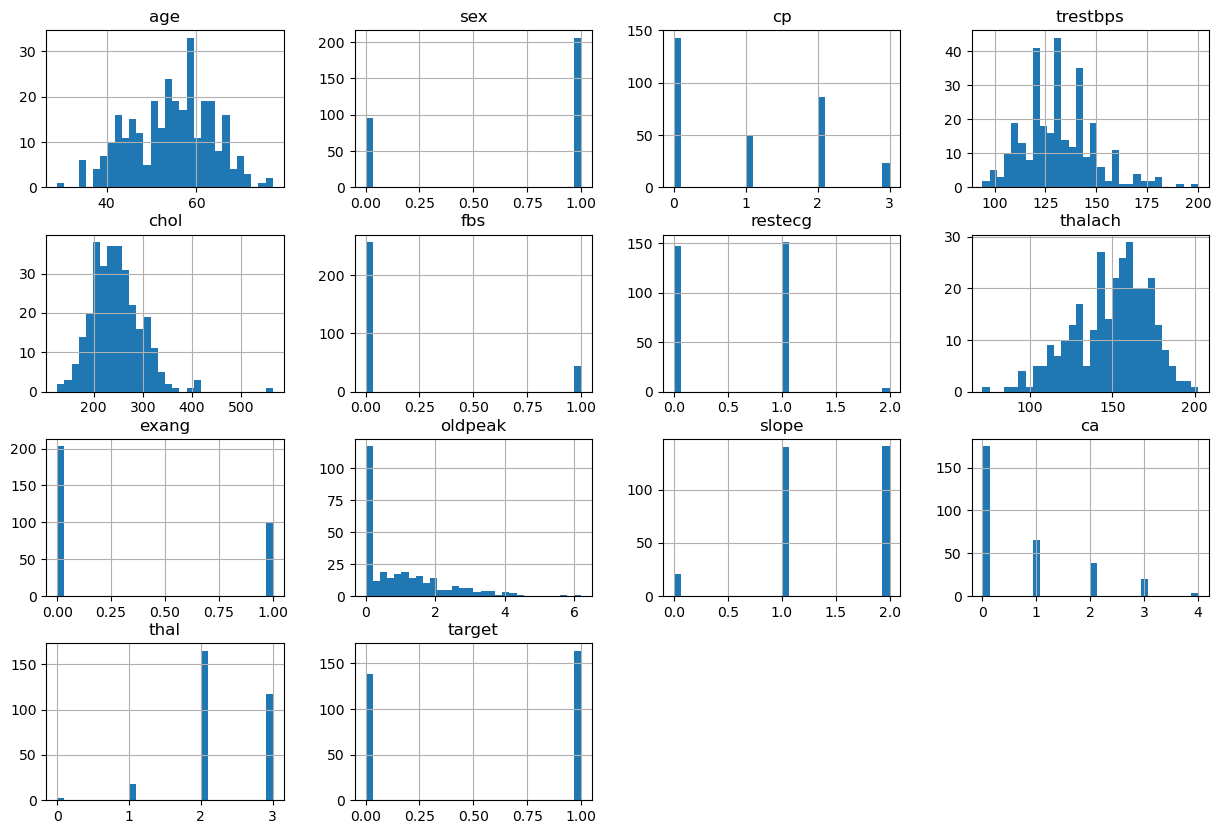

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram 
df.hist(bins=30, figsize=(15, 10))
plt.show()




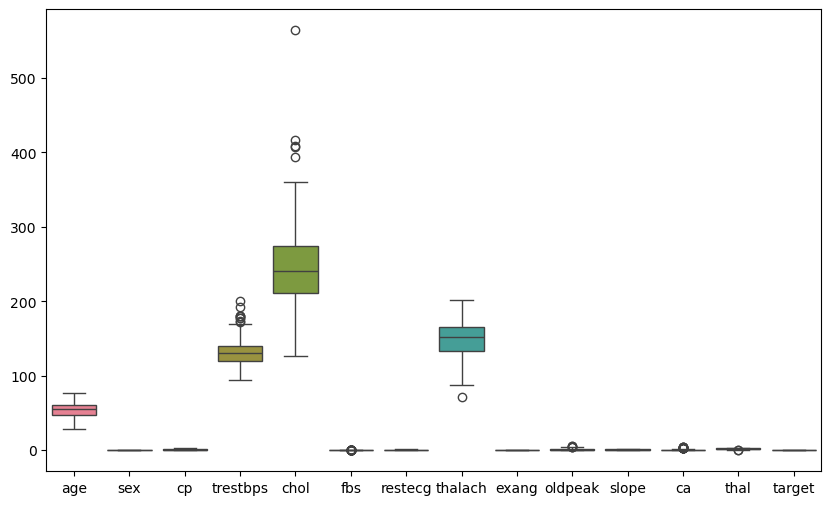

In [174]:
# Boxplot 
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.show()

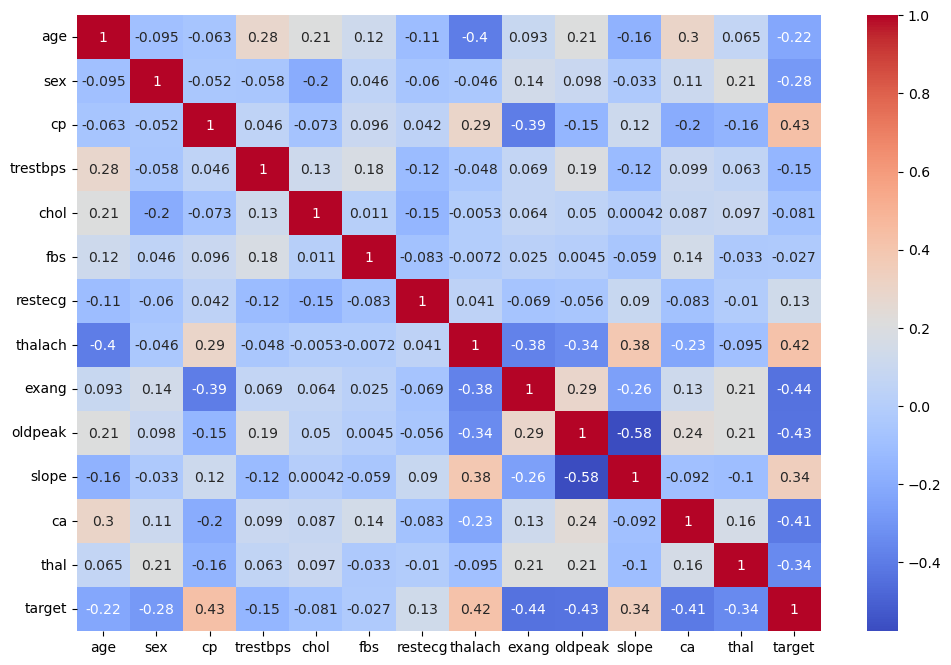

In [176]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [178]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['target'])  
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [180]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_test = accuracy_score(y_test, pred)
print('Accuracy with Random Forest Classifier ', accuracy_test)

Accuracy with Random Forest Classifier  0.8360655737704918


In [60]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 163.8 kB/s eta 0:12:43
   ---------------------------------------- 0.0/124.9 MB 163.4 kB/s eta 0:12:45
   ---------------------------------------- 0.1/124.9 MB 251.0 kB/s eta 0:08:18
   ---------------------------------------- 0.1/124.9 MB 326.8 kB/s eta 0:06:22
   ---------------------------------------- 0.1/124.9 MB 359.9 kB/s eta 0:05:47
   ---------------------------------------- 0.2/124.9 MB 398.2 kB/s eta 0:05:14
   ---------------------------------------- 0.2/124.9 MB 436.9 kB/s eta 0:04:46
   ---------------------------------------- 0.2/124.9 MB 427.7 kB/s eta 0:04:52
   --

In [182]:
import xgboost as xgb

xgboost_model = xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss')
xgboost_model.fit(X_train, y_train)
pred = xgboost_model.predict(X_test)
accuracy_test = accuracy_score(y_test, pred)

C:\Users\Muneeb\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:54:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [184]:
print('Accuracy with xgboost using  validation split training samples  80% :  ',accuracy_test)

Accuracy with xgboost using  validation split training samples  80% :   0.8032786885245902


In [186]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=1)
ada_boost = AdaBoostClassifier(estimator=tree, n_estimators=50)
ada_boost.fit(X_train, y_train)
pred = ada_boost.predict(X_test)
accuracy_test = accuracy_score(y_test, pred)

C:\Users\Muneeb\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [142]:
print('Accuracy with adaboost  using  validation split training samples 80% : ', accuracy_test)

Accuracy with adaboost  using  validation split training samples 80% :  0.7362637362637363


In [188]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['target'])  
y = df['target']

X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.3, random_state=42)
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_validate)

In [190]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_validate)
accuracy_test = accuracy_score(y_validate, pred)


C:\Users\Muneeb\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [140]:
print('Accuracy with Random Forest Classifier using  validation split training samples  70% : ', accuracy_test)

Accuracy with Random Forest Classifier using  validation split training samples  70% :  0.7362637362637363


In [192]:
import xgboost as xgb

xgboost_model = xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss')
xgboost_model.fit(X_train, y_train)
pred = xgboost_model.predict(X_validate)
accuracy_test = accuracy_score(y_validate, pred)

C:\Users\Muneeb\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:54:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [194]:
print('Accuracy with xgboost using  validation split training samples  70% :  ',accuracy_test)

Accuracy with xgboost using  validation split training samples  70% :   0.6923076923076923


In [196]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=1)
ada_boost = AdaBoostClassifier(estimator=tree, n_estimators=50)
ada_boost.fit(X_train, y_train)
pred = ada_boost.predict(X_validate)
accuracy_test = accuracy_score(y_validate, pred)

C:\Users\Muneeb\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Muneeb\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


In [152]:
print('Accuracy with adaboost  using  validation split training samples 70% : ', accuracy_test)

Accuracy with adaboost  using  validation split training samples 70% :  0.5714285714285714


# QUESTION#2


In [199]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df1 = pd.read_csv('heart.csv') 

In [201]:
X = df1[['restecg', 'oldpeak']]
y = df1['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [203]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

voting_hard = VotingClassifier(estimators=[('dt', dt), ('knn', knn), ('rf', rf), ('xgb', xgb)], voting='hard')
voting_soft = VotingClassifier(estimators=[('dt', dt), ('knn', knn), ('rf', rf), ('xgb', xgb)], voting='soft')

voting_hard.fit(X_train_scaled, y_train)
y_pred_hard = voting_hard.predict(X_test_scaled)
accuracy_hard = accuracy_score(y_test, y_pred_hard)

voting_soft.fit(X_train_scaled, y_train)
y_pred_soft = voting_soft.predict(X_test_scaled)
accuracy_soft = accuracy_score(y_test, y_pred_soft)

print(f"Accuracy with Hard Voting: {accuracy_hard:.4f}")
print(f"Accuracy with Soft Voting: {accuracy_soft:.4f}")


Accuracy with Hard Voting: 0.6829
Accuracy with Soft Voting: 0.6878


In [205]:
voting_weighted = VotingClassifier(estimators=[('dt', dt), ('knn', knn), ('rf', rf), ('xgb', xgb)], 
                                   voting='soft', weights=[1, 1, 2, 2]) 

voting_weighted.fit(X_train_scaled, y_train)
y_pred_weighted = voting_weighted.predict(X_test_scaled)
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)

print(f"Accuracy with Weighted Voting: {accuracy_weighted:.4f}")


Accuracy with Weighted Voting: 0.6878


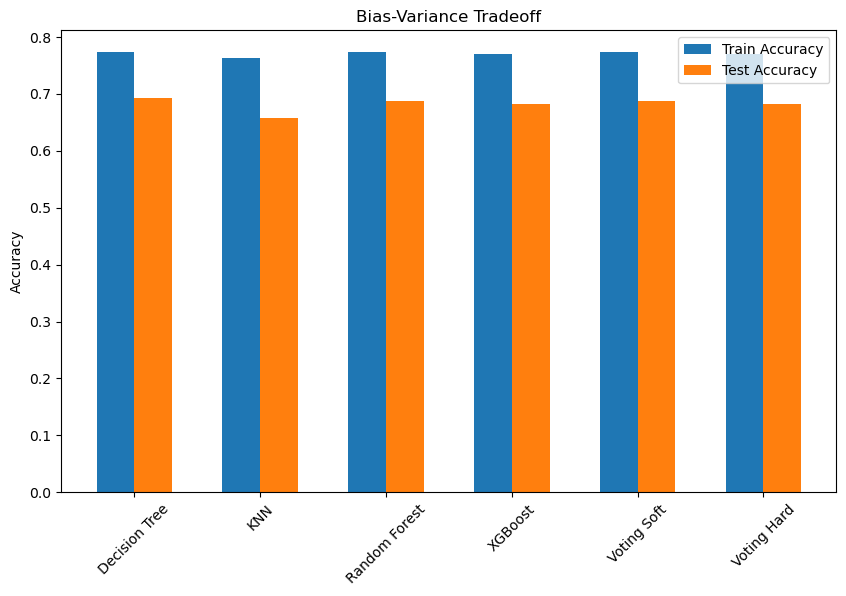

In [209]:
import matplotlib.pyplot as plt
import numpy as np

def get_accuracies(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    return train_acc, test_acc

models = [dt, knn, rf, xgb, voting_soft, voting_hard]
model_names = ['Decision Tree', 'KNN', 'Random Forest', 'XGBoost', 'Voting Soft', 'Voting Hard']
train_accuracies = []
test_accuracies = []

for model in models:
    train_acc, test_acc = get_accuracies(model, X_train_scaled, X_test_scaled, y_train, y_test)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

x = np.arange(len(model_names))
width = 0.3
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, train_accuracies, width=0.3, label='Train Accuracy' )
plt.bar(x + width/2, test_accuracies, width=0.3, label='Test Accuracy')
plt.xticks(x, model_names, rotation=45)
plt.ylabel('Accuracy')
plt.title('Bias-Variance Tradeoff')
plt.legend()
plt.show()


# QUESTION#3

In [212]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df2 = pd.read_csv('heart.csv') 

In [214]:
X = df2[['restecg', 'chol']]
y = df2['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [216]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(random_state=42)
ada = AdaBoostClassifier(random_state=42)
voting = VotingClassifier(estimators=[('rf', rf), ('ada', ada)], voting='soft')
rf.fit(X_train_scaled, y_train)
ada.fit(X_train_scaled, y_train)
voting.fit(X_train_scaled, y_train)

rf_train_acc = accuracy_score(y_train, rf.predict(X_train_scaled))
rf_test_acc = accuracy_score(y_test, rf.predict(X_test_scaled))

ada_train_acc = accuracy_score(y_train, ada.predict(X_train_scaled))
ada_test_acc = accuracy_score(y_test, ada.predict(X_test_scaled))

voting_train_acc = accuracy_score(y_train, voting.predict(X_train_scaled))
voting_test_acc = accuracy_score(y_test, voting.predict(X_test_scaled))

C:\Users\Muneeb\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Muneeb\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [218]:
print(f"Random Forest Train Accuracy: {rf_train_acc:.4f}")
print(f"Random Forest Test Accuracy: {rf_test_acc:.4f}")
print(f"AdaBoost Train Accuracy: {ada_train_acc:.4f}")
print(f"AdaBoost Test Accuracy: {ada_test_acc:.4f}")
print(f"Voting Classifier Train Accuracy: {voting_train_acc:.4f}")
print(f"Voting Classifier Test Accuracy: {voting_test_acc:.4f}")

Random Forest Train Accuracy: 0.8988
Random Forest Test Accuracy: 0.7659
AdaBoost Train Accuracy: 0.6817
AdaBoost Test Accuracy: 0.6390
Voting Classifier Train Accuracy: 0.8988
Voting Classifier Test Accuracy: 0.7659


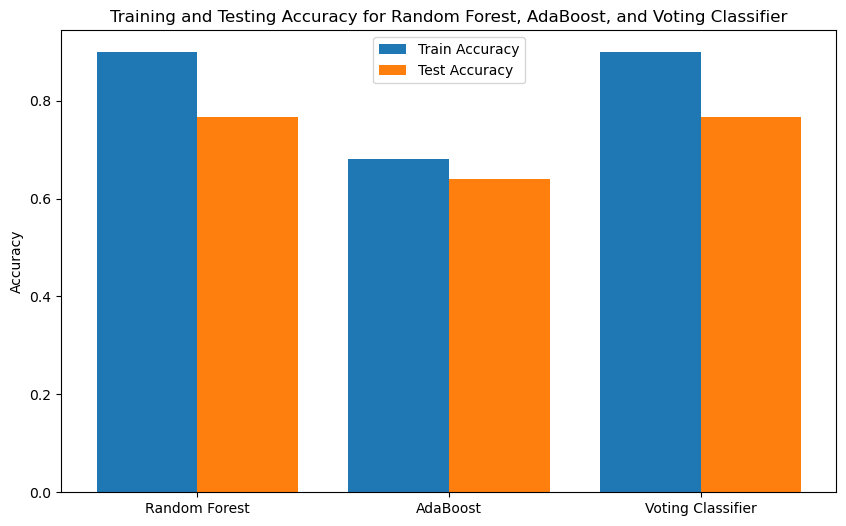

In [222]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Random Forest', 'AdaBoost', 'Voting Classifier']
train_accuracies = [rf_train_acc, ada_train_acc, voting_train_acc]
test_accuracies = [rf_test_acc, ada_test_acc, voting_test_acc]
x = np.arange(len(models))

plt.figure(figsize=(10, 6))
plt.bar(x - 0.2, train_accuracies, width=0.4, label='Train Accuracy')
plt.bar(x + 0.2, test_accuracies, width=0.4, label='Test Accuracy')
plt.xticks(x, models)
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy for Random Forest, AdaBoost, and Voting Classifier')
plt.legend()
plt.show()
